In [1]:
# Source 1 of data: basketball-reference.com 
# Source 2 of data: Nba.com API 
# Source 3 of data: https://hoopshype.com/ 
# Data type 1: CSV 
# Data type 2: JSON 
# Data type 3: xml 

In [2]:
# importing all important libraries
# libraries I used are: pandas, numpy, requests, BS4, seaborn, and matplot
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 200

In [3]:
# this creates a dataframe for the MVPs.csv file 
# https://www.basketball-reference.com/awards/mvp.html CSV file sourced from this website
mvpDF = pd.read_csv("MVPs.csv") 

In [4]:
# selects the players name, age, amount of games, and team played columns from mvpDF
mvpTable = mvpDF[["Player","Age","G", "Tm", "Year"]]
mvpTable # prints out the table

,Player,Age,G,Tm,Year
0,Nikola Jokić,26,74,DEN,2022
1,Nikola Jokić,25,72,DEN,2021
2,Giannis Antetokounmpo,25,63,MIL,2020
3,Giannis Antetokounmpo,24,72,MIL,2019
4,James Harden,28,72,HOU,2018
...,...,...,...,...,...
62,Wilt Chamberlain,23,72,PHW,1960
63,Bob Pettit,26,72,STL,1959
64,Bill Russell,23,69,BOS,1958
65,Bob Cousy,28,64,BOS,1957


In [5]:
# we now have a list of every single NBA MVP dating back to 1955
# using this list, we can now sort by a variety of statistics, like age

mvpTable.sort_values("Age",ascending=False).head(100) 
# i used .sort_values and used the 'Age' tag to sort from oldest, to youngest MVP 

,Player,Age,G,Tm,Year
23,Karl Malone,35,49,UTA,1999
24,Michael Jordan,34,82,CHI,1998
25,Karl Malone,33,82,UTA,1997
26,Michael Jordan,32,82,CHI,1996
42,Kareem Abdul-Jabbar,32,82,LAL,1980
...,...,...,...,...,...
51,Kareem Abdul-Jabbar,23,82,MIL,1971
47,Bob McAdoo,23,82,BUF,1975
66,Bob Pettit,23,72,STL,1956
11,Derrick Rose,22,81,CHI,2011


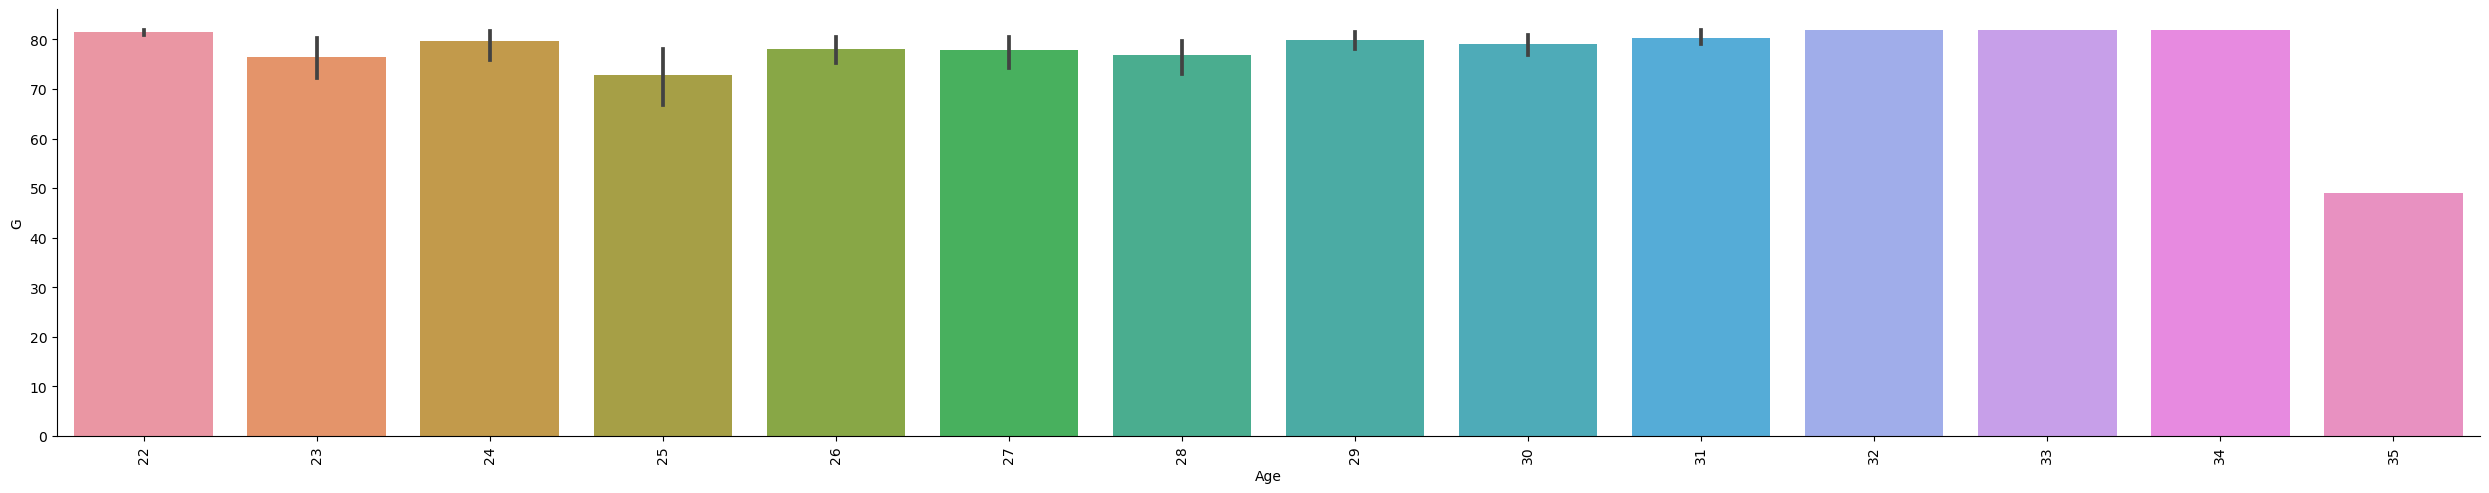

In [6]:
# here is another way of visualizing the data, by seeing how many games each mvp played, at each age
sb.catplot(x="Age",y="G",aspect=5,data=mvpDF,kind="bar").set_xticklabels(rotation=90)

In [7]:
# here we are making another table with more statistics
# i couldn't include steals or blocks because these stats were not recorded for some older players
mvpTable2 = mvpDF[["Player","Age","G", "Tm", "MP", "PTS", "TRB", "AST", "FG%", "Year"]]
mvpTable2 # prints out the table

,Player,Age,G,Tm,MP,PTS,TRB,AST,FG%,Year
0,Nikola Jokić,26,74,DEN,33.5,27.1,13.8,7.9,0.583,2022
1,Nikola Jokić,25,72,DEN,34.6,26.4,10.8,8.3,0.566,2021
2,Giannis Antetokounmpo,25,63,MIL,30.4,29.5,13.6,5.6,0.553,2020
3,Giannis Antetokounmpo,24,72,MIL,32.8,27.7,12.5,5.9,0.578,2019
4,James Harden,28,72,HOU,35.4,30.4,5.4,8.8,0.449,2018
...,...,...,...,...,...,...,...,...,...,...
62,Wilt Chamberlain,23,72,PHW,46.4,37.6,27.0,2.3,0.461,1960
63,Bob Pettit,26,72,STL,39.9,29.2,16.4,3.1,0.438,1959
64,Bill Russell,23,69,BOS,38.3,16.6,22.7,2.9,0.442,1958
65,Bob Cousy,28,64,BOS,36.9,20.6,4.8,7.5,0.378,1957


In [8]:
# here, I am using .mean() to get the average of each column

# gets the average minutes played of all the MVPs
avgMvpMP = mvpTable2.MP.mean()

# gets the average points per game of all the MVPs
avgMvpPTS = mvpTable2.PTS.mean()


# gets the average rebounds per game of all the MVPs
avgMvpTRB = mvpTable2.TRB.mean()

# gets the average assists per game of all the MVPs
avgMvpAST = mvpTable2.AST.mean()

# gets the average FG% of all the MVPs (had to use brackets because there is a % in the tag FG%)
avgMvpFG = mvpTable2['FG%'].mean()

# gets the average age of all the MVPs
avgMvpAGE = mvpTable2.Age.mean()

print("Average MP Per Game: %.1f" % avgMvpMP) # rounded to 1 decimal place
print("Average PTS Per Game: %.1f" % avgMvpPTS) # rounded to 1 decimal place
print("Average TRB Per Game: %.1f" % avgMvpTRB) # rounded to 1 decimal place
print("Average AST Per Game: %.1f" % avgMvpAST) # rounded to 1 decimal place
print("Average FG Percentage: %.3f" % avgMvpFG) # rounded to 3 decimal places
print("Average Age: " + str(int(avgMvpAGE))) # casted the avgMvpAGE as an int so its a whole number, and then as a string so I could concatinate it


# given this data, we can see that the average NBA MVP plays 38.9 minutes per game, averages 26.1 points per
# game, averages 12.2 rebounds per game, and has 5.6 assists per game while shooting just about 51% from the field,
# and the average age of an MVP is 27

Average MP Per Game: 38.9
Average PTS Per Game: 26.1
Average TRB Per Game: 12.2
Average AST Per Game: 5.6
Average FG Percentage: 0.508
Average Age: 27


In [9]:
# this creates a dataframe for the Champions.csv file 
# https://www.basketball-reference.com/leagues CSV file sourced from this website
championDF = pd.read_csv("Champions.csv") 

In [10]:
# selects the Year and Champion columns from championDF
championTable = championDF[["Year","Tm"]]
championTable # prints out the table

,Year,Tm
0,2022,Golden State Warriors
1,2021,Milwaukee Bucks
2,2020,Los Angeles Lakers
3,2019,Toronto Raptors
4,2018,Golden State Warriors
...,...,...
72,1959,Boston Celtics
73,1958,St. Louis Hawks
74,1957,Boston Celtics
75,1956,Philadelphia Warriors


In [11]:
# i used .replace() here to replace the team name abbreviations so that they would be the same
# as the team names in the chamapionTable so that I could easily compare them. a

# attached below is the link to the syntax that I used 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

mvpTable2 = mvpTable2.replace({'Tm': {
    'ATL': 'Atlanta Hawks',
    'BOS': 'Boston Celtics',
    'BKN': 'Brooklyn Nets',
    'CHA': 'Charlotte Hornets',
    'CHI': 'Chicago Bulls',
    'CLE': 'Cleveland Cavaliers',
    'DAL': 'Dallas Mavericks',
    'DEN': 'Denver Nuggets',
    'DET': 'Detroit Pistons',
    'GSW': 'Golden State Warriors',
    'HOU': 'Houston Rockets',
    'IND': 'Indiana Pacers',
    'LAC': 'Los Angeles Clippers',
    'LAL': 'Los Angeles Lakers',
    'MEM': 'Memphis Grizzlies',
    'MIA': 'Miami Heat',
    'MIL': 'Milwaukee Bucks',
    'MIN': 'Minnesota Timberwolves',
    'NOP': 'New Orleans Pelicans',
    'NYK': 'New York Knicks',
    'OKC': 'Oklahoma City Thunder',
    'ORL': 'Orlando Magic',
    'PHI': 'Philadelphia 76ers',
    'PHX': 'Phoenix Suns',
    'POR': 'Portland Trail Blazers',
    'SAC': 'Sacramento Kings',
    'SAS': 'San Antonio Spurs',
    'TOR': 'Toronto Raptors',
    'UTA': 'Utah Jazz',
    'WAS': 'Washington Wizards'
}})


In [12]:
# here I used the pd.merge() to merge the two tables I have allowing me to compare them together
# below is the link to where I found the syntax to use it
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

# merge the two tables I have on the "Year" and "Tm" columns
mergedData = pd.merge(mvpTable2, championTable, left_on=['Year', 'Tm'], right_on=['Year', 'Tm'])

# print the merged data as a table including the year, team, and the MVP
mvpChampionTable = mergedData[['Year', 'Tm', 'Player', 'Age', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%']]

In [13]:
# in the mvpChampionTable, we can see in what years did a player who won the mvp award, also won the NBA
# championship. 

mvpChampionTable

,Year,Tm,Player,Age,G,MP,PTS,TRB,AST,FG%
0,2015,Golden State Warriors,Stephen Curry,26,80,32.7,23.8,4.3,7.7,0.487
1,2013,Miami Heat,LeBron James,28,76,37.9,26.8,8.0,7.3,0.565
2,2012,Miami Heat,LeBron James,27,62,37.5,27.1,7.9,6.2,0.531
3,2003,San Antonio Spurs,Tim Duncan,26,81,39.3,23.3,12.9,3.9,0.513
4,2000,Los Angeles Lakers,Shaquille O'Neal,27,79,40.0,29.7,13.6,3.8,0.574
5,1998,Chicago Bulls,Michael Jordan,34,82,38.8,28.7,5.8,3.5,0.465
6,1996,Chicago Bulls,Michael Jordan,32,82,37.7,30.4,6.6,4.3,0.495
7,1994,Houston Rockets,Hakeem Olajuwon,31,80,41.0,27.3,11.9,3.6,0.528
8,1992,Chicago Bulls,Michael Jordan,28,80,38.8,30.1,6.4,6.1,0.519
9,1991,Chicago Bulls,Michael Jordan,27,82,37.0,31.5,6.0,5.5,0.539


In [14]:
# gets the length of our table
mvpChampTotal = len(mvpChampionTable)

# formats in the mvpChampTotal variable
print("There has been a total of {} times when a player who has won the NBA MVP award, also won the NBA championship.".format(mvpChampTotal))


There has been a total of 23 times when a player who has won the NBA MVP award, also won the NBA championship.


In [15]:
# given that there has only been 23 times when a player has won the NBA MVP, and the NBA Championship, the players
# who have done this must be some of the best players of all time, right? 
# i am now making a function to search through multiple API URL's from nba.com 

def playerSearch():
    
    # API url for playoff all time stat leaders
    playoffURL = "https://stats.nba.com/stats/leagueLeaders?ActiveFlag=No&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Playoffs&StatCategory="
    
    # API url for regular season all time stat leaders
    regularSeasonURL = "https://stats.nba.com/stats/leagueLeaders?ActiveFlag=No&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Regular%20Season&StatCategory="
    
    # empty variable to store users URL 
    baseURL = ""
    
    # determine what URL to use from user input
    urlChoice = input("Enter 1 for playoff stats, 2 for regular season stats: ")

    if urlChoice == "1":
        baseURL = "https://stats.nba.com/stats/leagueLeaders?ActiveFlag=No&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Playoffs&StatCategory="
    
    elif urlChoice == "2":
        baseURL = "https://stats.nba.com/stats/leagueLeaders?ActiveFlag=No&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Regular%20Season&StatCategory="
    
    else:
        print("Invalid choice. Please try again and enter 1 or 2.")
        return
    
    
    # determine what stat to use from user input
    statChoice = input("Please enter what stat you want to sort by. Your options are: PTS, AST, or FG3M")
    
    if statChoice == "PTS":
        print ("Sounds good. PTS it is.")
        
    elif statChoice == "AST":
        print ("Sounds good. AST it is.")
    
    elif statChoice == "FG3M": 
        print ("Sounds good. FG3M it is.")
        
    else:
        print("Invalid choice. Please try again and enter PTS, AST, or FG3M.")
        return
    

    # makes query request from the users URL choice, and stat choice
    query = requests.get(url=baseURL + statChoice).json() # formats json request
    
    # gathers headers
    headers = query['resultSet']['headers']
    
    # declares dataframe
    leaderDF = pd.DataFrame(query['resultSet']['rowSet'], columns = headers)
    
    # displays top 20 players in the given catagory
    leaderDF = leaderDF.head(20)
    
    # this will return a plot of the amount of games played each person on the DF to hit the top 20 in the stat
    # it is a great way to vizualize the data, and see if the amount of games played by each player to hit
    # the top 20
    sb.catplot(x=statChoice, y="GP", aspect=4, data=leaderDF, kind="bar").set_xticklabels(rotation=90)
    
    # returns dataframe
    return (leaderDF) 
    


Enter 1 for playoff stats, 2 for regular season stats: 1
Please enter what stat you want to sort by. Your options are: PTS, AST, or FG3MPTS
Sounds good. PTS it is.


,PLAYER_ID,Player,GP,MP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,EFG_PCT,TS_PCT,GP_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,STL_RANK,BLK_RANK,TOV_RANK,PF_RANK,PTS_RANK,AST_TOV_RANK,STL_TOV_RANK,EFG_PCT1,TS_PCT1
0,2544,LeBron James,287,11858.0,2928,5896.0,0.497,470.0,1415.0,0.332,1836,2479,0.741,430.0,2153.0,2583.0,2067.0,483.0,275.0,1034.0,655.0,8162,1.999,0.467,0.536,0.584,1,1,1,1,591,3,2,714,1,1,1262,16,1,4,2,1,10,1,8,1,469,1078,491,405
1,893,Michael Jordan,179,7474.0,2188,4497.0,0.487,148.0,446.0,0.332,1463,1766,0.828,305.0,847.0,1152.0,1022.0,376.0,158.0,546.0,541.0,5987,1.872,0.689,0.503,0.568,19,12,3,3,659,59,48,717,2,3,591,36,29,39,13,3,34,12,20,2,507,587,761,558
2,76003,Kareem Abdul-Jabbar,237,8851.0,2356,4422.0,0.533,0.0,4.0,0.000,1050,1419,0.740,505.0,1273.0,2481.0,767.0,189.0,476.0,447.0,797.0,5762,1.107,0.336,0.533,0.571,5,3,2,4,328,1205,1079,1205,12,10,1265,9,6,6,32,36,2,21,1,3,1052,1372,517,525
3,977,Kobe Bryant,220,8641.0,2014,4499.0,0.448,292.0,882.0,0.331,1320,1617,0.816,230.0,889.0,1119.0,1040.0,310.0,144.0,647.0,660.0,5640,1.607,0.479,0.480,0.541,7,4,5,2,1099,11,8,718,3,7,671,66,25,40,12,6,41,4,7,4,663,1052,1127,844
4,406,Shaquille O'Neal,216,8098.0,2041,3627.0,0.563,0.0,0.0,0.000,1168,2317,0.504,866.0,1642.0,2508.0,582.0,117.0,459.0,649.0,769.0,5250,0.897,0.180,0.563,0.565,9,6,4,7,238,1205,1607,1205,8,2,2132,1,3,5,50,92,4,3,2,5,1307,1629,342,583
5,1495,Tim Duncan,251,9370.0,1975,3939.0,0.501,5.0,35.0,0.143,1217,1766,0.689,778.0,2081.0,2859.0,764.0,168.0,568.0,633.0,701.0,5172,1.207,0.265,0.502,0.548,3,2,6,5,454,759,602,1159,6,3,1597,2,2,3,33,48,1,5,4,6,980,1527,770,760
6,201142,Kevin Durant,170,6893.0,1684,3528.0,0.477,366.0,1029.0,0.356,1251,1441,0.868,129.0,1198.0,1327.0,709.0,172.0,204.0,550.0,427.0,4985,1.289,0.313,0.529,0.599,25,14,8,8,748,6,5,517,5,9,376,186,9,28,35,43,24,10,54,7,906,1456,544,328
7,252,Karl Malone,193,7907.0,1743,3768.0,0.463,6.0,37.0,0.162,1269,1725,0.736,502.0,1560.0,2062.0,610.0,258.0,135.0,550.0,662.0,4761,1.109,0.469,0.463,0.526,11,7,7,6,899,727,586,1148,4,5,1295,10,4,7,42,17,50,10,6,8,1051,1073,1357,1046
8,78497,Jerry West,153,6321.0,1622,3460.0,0.469,NaN,NaN,NaN,1213,1506,0.805,0.0,2.0,855.0,970.0,0.0,0.0,NaN,451.0,4457,NaN,NaN,0.469,0.541,43,21,9,10,825,2138,2138,2138,7,8,736,1997,1900,71,17,1883,1683,2197,40,9,2197,2197,1275,847
9,2225,Tony Parker,226,7758.0,1613,3501.0,0.461,119.0,385.0,0.309,700,958,0.731,108.0,558.0,666.0,1143.0,198.0,19.0,594.0,429.0,4045,1.924,0.333,0.478,0.516,6,8,10,9,923,84,66,807,31,27,1326,234,69,119,6,34,447,7,53,10,487,1374,1168,1202


,Player,Tm
0,Stephen Curry,Golden State Warriors
1,LeBron James,Miami Heat
2,LeBron James,Miami Heat
3,Tim Duncan,San Antonio Spurs
4,Shaquille O'Neal,Los Angeles Lakers
5,Michael Jordan,Chicago Bulls
6,Michael Jordan,Chicago Bulls
7,Michael Jordan,Chicago Bulls
8,Michael Jordan,Chicago Bulls
9,Hakeem Olajuwon,Houston Rockets


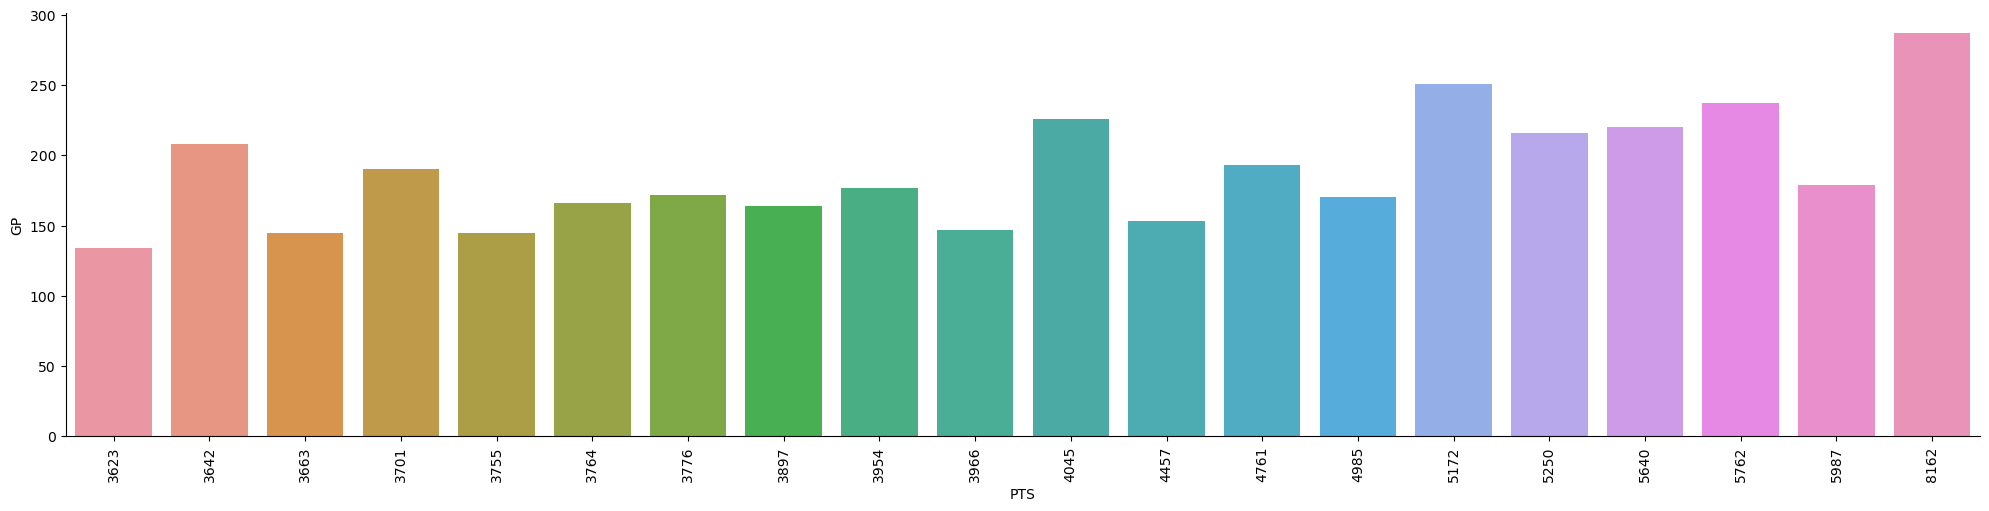

In [16]:
# when I run this function, it takes no parameters but will ask the user for 2 inputs
# the first input is whether they want to search through all time playoff leaders, or all time regular season leaders
# after they decide what they want to search through, they are then asked what stat they want to sort by
# once they decide this, a dataframe is created by piecing together the inputs into one API link, and it is sorted
# in descending order, for the top 20 in the catagory

# i couldn't figure out how to show two DF's at the same time, so i used display(), and that worked
# https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/

leaderDF = playerSearch()
leaderDF = leaderDF.rename(columns={'PLAYER_NAME': 'Player', 'MIN': 'MP'})
display(leaderDF)


# merge the two tables I have 
mergedDataTwo = pd.merge(mvpChampionTable, leaderDF, left_on=['Player',], right_on=['Player'])

# print the merged data as a table including the year, team
mvpChampStatLeader = mergedDataTwo[['Player', 'Tm']]

# whatever stat you selected from the playerSearch function, will return which players were in the top 20 in the given
# stat, and have won won the MVP the same year that they won the NBA championship showing 
# that these players who accomplished all these feats are truly elite
mvpChampStatLeader



In [17]:
# now that we have a system to find the best of the best in the user's specific catagory, it is time to see how
# their salary correlates and if they are payed accordingly

# unfortunately, the farthest back i could find for consistent salary data was 1990, so players in the catagory
# we found earlier who had their season before 1990 will be left out

# i also used .replace() to remove commas and dollar signs, then casted the salaries as ints so i can
# work with them later
# https://www.w3schools.com/python/ref_string_replace.asp


yearOne = 1990 # declares year variables to format into our season 
yearTwo = 1991

# creates a DF to hold players who were top 5 in salary in the NBA at some point, and won an MVP and championship
matchingPlayers = []
onlyAdjustedSalaries = []
onlySalaries = []
years = [] # holds the given year


while yearTwo < 2023: # runs until the 2022-2023 season
    
    givenSeason = ("{}-{}".format(yearOne,yearTwo)) # formats in yearOne and yearTwo so the season can change each loop

    salaryURL = ('https://hoopshype.com/salaries/players/{}/'.format(givenSeason)) # formats in the season to the URL

    salaryQuery = requests.get(salaryURL).text # creates a request for the URL

    salarySoup = BeautifulSoup(salaryQuery, 'lxml') # goes through the request, and parses it using lxml
    
    tableHolder = salarySoup.find_all('table')[0] # creates a variable to hold the first table from the webpage
    
    playerTeamSalary = [] # declares a list to hold the players name, their salary at the time, and their salary adjusted for inflation
    
    
    
    for row in tableHolder.find_all('tr')[1:6]: # goes through each row of the table and locates 'tr', which contains 'td'
        player = row.find_all('td')[1].text.strip() # the first 'td' contains the players name
        salary = int(row.find_all('td')[2].text.strip().replace(',', '').replace('$', '')) # the second 'td' contains the players salary at the time
        adjustedSalary = int(row.find_all('td')[3].text.strip().replace(',', '').replace('$', '')) # the third salary contains the players salary adjusted for inflation
        playerTeamSalary.append([player, salary, adjustedSalary]) # we then add each variable to our list
        onlyAdjustedSalaries.append([adjustedSalary])
        onlySalaries.append([salary])
        years.append(yearOne)
    
    
    salaryDF = pd.DataFrame(playerTeamSalary, columns=['Player', 'Salary', 'Adjusted Salary']) # creates a DF using the list, and creates column names
    print("{} season:".format(givenSeason)) # formats in the season to show what season it is for the DF printed
    display(salaryDF) # uses display() to show our DF
    
     #increases each year by 1 to move on to next season
    yearOne += 1 
    yearTwo += 1
    
    
    for player in salaryDF['Player']:
        if player in mvpChampStatLeader['Player'].values:
            matchingPlayers.append(player)

adjustedSalaryOnlyDF = pd.DataFrame(onlyAdjustedSalaries,  columns=['Adjusted Salary']) # creates DF w/ just the adjustedsalary
salaryOnlyDF = pd.DataFrame(onlySalaries, columns = ['Salary']) # creates DF w/ just the salary

adjustedSalaryOnlyDF['Year'] = years # adds the year
salaryOnlyDF['Year'] = years
   

1990-1991 season:


,Player,Salary,Adjusted Salary
0,Patrick Ewing,4250000,9982396
1,Hot Rod Williams,3785000,8890204
2,Hakeem Olajuwon,3175000,7457437
3,Charles Barkley,2900000,6811517
4,Chris Mullin,2850000,6694077


1991-1992 season:


,Player,Salary,Adjusted Salary
0,Larry Bird,7070000,15861181
1,Hot Rod Williams,3786000,8493696
2,Kevin McHale,3500000,7852069
3,Reggie Lewis,3340000,7493118
4,Michael Jordan,3250000,7291207


1992-1993 season:


,Player,Salary,Adjusted Salary
0,David Robinson,5720000,12448099
1,Michael Jordan,4000000,8704964
2,Hot Rod Williams,3786000,8239248
3,Vlade Divac,3633000,7906283
4,Robert Parish,3513000,7645134


1993-1994 season:


,Player,Salary,Adjusted Salary
0,David Robinson,5740000,12128294
1,Buck Williams,5050000,10670363
2,John Williams,4886000,10323840
3,Vlade Divac,4133000,8732794
4,Robert Parish,4000000,8451772


1994-1995 season:


,Player,Salary,Adjusted Salary
0,Magic Johnson,14660000,30222283
1,David Robinson,7300000,15049295
2,James Worthy,7250000,14946217
3,A.C. Green,6472600,13343571
4,Detlef Schrempf,5000000,10307736


1995-1996 season:


,Player,Salary,Adjusted Salary
0,Patrick Ewing,18724000,37461383
1,Clyde Drexler,9810000,19627011
2,David Robinson,7700000,15405503
3,Chris Webber,7000000,14005003
4,Joe Dumars,6881000,13766918


1996-1997 season:


,Player,Salary,Adjusted Salary
0,Michael Jordan,30140000,58685292
1,Horace Grant,14857000,28927915
2,Reggie Miller,11250000,21904762
3,Shaquille O'Neal,10714000,20861122
4,Gary Payton,10212000,19883682


1997-1998 season:


,Player,Salary,Adjusted Salary
0,Michael Jordan,33140000,63077431
1,Patrick Ewing,20500000,39018930
2,Horace Grant,14285714,27190891
3,Shaquille O'Neal,12857143,24471803
4,David Robinson,12397440,23596821


1998-1999 season:


,Player,Salary,Adjusted Salary
0,Patrick Ewing,18500000,34628935
1,Shaquille O'Neal,15000000,28077515
2,David Robinson,14841000,27779893
3,Kevin Garnett,14000000,26205680
4,Alonzo Mourning,13130000,24577185


1999-2000 season:


,Player,Salary,Adjusted Salary
0,Shaquille O'Neal,17142858,31470759
1,Kevin Garnett,16806300,30852908
2,Alonzo Mourning,15004800,27545725
3,Patrick Ewing,15000000,27536913
4,Juwan Howard,15000000,27536913


2000-2001 season:


,Player,Salary,Adjusted Salary
0,Kevin Garnett,19610000,34705263
1,Shaquille O'Neal,19285715,34131352
2,Alonzo Mourning,16880000,29873781
3,Juwan Howard,16875000,29864932
4,Hakeem Olajuwon,16700000,29555222


2001-2002 season:


,Player,Salary,Adjusted Salary
0,Kevin Garnett,22400000,38395739
1,Shaquille O'Neal,21428572,36730618
2,Alonzo Mourning,18754800,32147518
3,Juwan Howard,18750000,32139290
4,Scottie Pippen,18083564,30996955


2002-2003 season:


,Player,Salary,Adjusted Salary
0,Kevin Garnett,25200000,42739003
1,Shaquille O'Neal,23571429,39976960
2,Alonzo Mourning,20629800,34987980
3,Juwan Howard,20625000,34979839
4,Scottie Pippen,19727524,33457727


2003-2004 season:


,Player,Salary,Adjusted Salary
0,Kevin Garnett,28000000,46505454
1,Shaquille O'Neal,24749999,41107498
2,Dikembe Mutombo,17714291,29421826
3,Rasheed Wallace,17000000,28235454
4,Allan Houston,15937500,26470738


2004-2005 season:


,Player,Salary,Adjusted Salary
0,Shaquille O'Neal,27696430,44546283
1,Dikembe Mutombo,19485719,31340370
2,Allan Houston,17531250,28196848
3,Chris Webber,17531250,28196848
4,Kevin Garnett,16000000,25734022


2005-2006 season:


,Player,Salary,Adjusted Salary
0,Shaquille O'Neal,20000000,31373676
1,Allan Houston,19125000,30001077
2,Chris Webber,19125000,30001077
3,Michael Finley,18612500,29197127
4,Kevin Garnett,18000000,28236308


2006-2007 season:


,Player,Salary,Adjusted Salary
0,Kevin Garnett,21000000,31578555
1,Shaquille O'Neal,20000000,30074815
2,Michael Finley,19030999,28617688
3,Chris Webber,18261024,27459845
4,Jason Kidd,18084000,27193647


2007-2008 season:


,Player,Salary,Adjusted Salary
0,Kevin Garnett,23750000,34779309
1,Michael Finley,21696750,31772546
2,Shaquille O'Neal,20000000,29287839
3,Jason Kidd,19728000,28889525
4,Jermaine O'Neal,19728000,28889525


2008-2009 season:


,Player,Salary,Adjusted Salary
0,Kevin Garnett,24751934,34513346
1,Jason Kidd,21372000,29800468
2,Jermaine O'Neal,21372000,29800468
3,Kobe Bryant,21262500,29647785
4,Shaquille O'Neal,21000000,29281763


2009-2010 season:


,Player,Salary,Adjusted Salary
0,Tracy McGrady,23239562,32873572
1,Kobe Bryant,23034375,32583325
2,Jermaine O'Neal,23016000,32557332
3,Tim Duncan,22183220,31379321
4,Shaquille O'Neal,20000000,28291043


2010-2011 season:


,Player,Salary,Adjusted Salary
0,Kobe Bryant,24806250,34723970
1,Rashard Lewis,19573711,27399423
2,Kevin Garnett,18800000,26316377
3,Tim Duncan,18700000,26176396
4,Michael Redd,18300000,25616473


2011-2012 season:


,Player,Salary,Adjusted Salary
0,Kobe Bryant,25244493,34123045
1,Vince Carter,21300000,28791263
2,Kevin Garnett,21247044,28719683
3,Tim Duncan,21164619,28608269
4,Rashard Lewis,21136631,28570437


2012-2013 season:


,Player,Salary,Adjusted Salary
0,Kobe Bryant,27849000,37027429
1,Brandon Roy,21459805,28532493
2,Dirk Nowitzki,20907128,27797666
3,Gilbert Arenas,20807922,27665764
4,Amare Stoudemire,19948799,26523492


2013-2014 season:


,Player,Salary,Adjusted Salary
0,Kobe Bryant,30453000,39791542
1,Dirk Nowitzki,22721381,29688989
2,Gilbert Arenas,22346536,29199196
3,Amare Stoudemire,21679893,28328124
4,Carmelo Anthony,21490000,28080000


2014-2015 season:


,Player,Salary,Adjusted Salary
0,Kobe Bryant,23500000,30082953
1,Joe Johnson,23180790,29674325
2,Carmelo Anthony,22458401,28749576
3,Amare Stoudemire,21896658,28030474
4,Dwight Howard,21436271,27441121


2015-2016 season:


,Player,Salary,Adjusted Salary
0,Kobe Bryant,25000000,31963580
1,LeBron James,22970500,29368777
2,Carmelo Anthony,22875000,29246676
3,Dwight Howard,22359364,28587413
4,Joe Johnson,22309344,28523459


2016-2017 season:


,Player,Salary,Adjusted Salary
0,LeBron James,30963450,39197185
1,Al Horford,26540100,33597587
2,Kevin Durant,26540100,33597587
3,James Harden,26540100,33597587
4,Mike Conley,26540100,33597587


2017-2018 season:


,Player,Salary,Adjusted Salary
0,Stephen Curry,34682550,43199600
1,LeBron James,33285709,41459735
2,Paul Millsap,30769231,38325281
3,Gordon Hayward,29727900,37028229
4,Blake Griffin,29512900,36760431


2018-2019 season:


,Player,Salary,Adjusted Salary
0,Stephen Curry,37457154,45353228
1,Russell Westbrook,35665000,43183283
2,Chris Paul,35654150,43170146
3,LeBron James,35654150,43170146
4,Kyle Lowry,32700000,39593253


2019-2020 season:


,Player,Salary,Adjusted Salary
0,Stephen Curry,40231758,47922728
1,Russell Westbrook,38506482,45867637
2,Chris Paul,38506482,45867637
3,James Harden,38199000,45501374
4,John Wall,38199000,45501374


2020-2021 season:


,Player,Salary,Adjusted Salary
0,Stephen Curry,43006362,50899072
1,Chris Paul,41358814,48949159
2,Russell Westbrook,41358814,48949159
3,James Harden,41254920,48826198
4,John Wall,41254920,48826198


2021-2022 season:


,Player,Salary,Adjusted Salary
0,Stephen Curry,45780966,51411079
1,John Wall,44310840,49760158
2,James Harden,44310840,49760158
3,Russell Westbrook,44211146,49648204
4,Kevin Durant,42018900,47186357


In [19]:

# here we can set the top adjusted salaries in NBA history, in descending order 
adjustedSalaryOnlyDF = adjustedSalaryOnlyDF.sort_values("Adjusted Salary",ascending=False) 
adjustedSalaryOnlyDF



,Adjusted Salary,Year
35,63077431,1997
30,58685292,1996
155,51411079,2021
150,50899072,2020
157,49760158,2021
...,...,...
8,7493118,1991
2,7457437,1990
9,7291207,1991
3,6811517,1990


In [20]:

# here we can set the top  salaries in NBA history, in descending order 
salaryOnlyDF = salaryOnlyDF.sort_values("Salary",ascending=False) 
salaryOnlyDF


,Salary,Year
155,45780966,2021
157,44310840,2021
156,44310840,2021
158,44211146,2021
150,43006362,2020
...,...,...
8,3340000,1991
9,3250000,1991
2,3175000,1990
3,2900000,1990


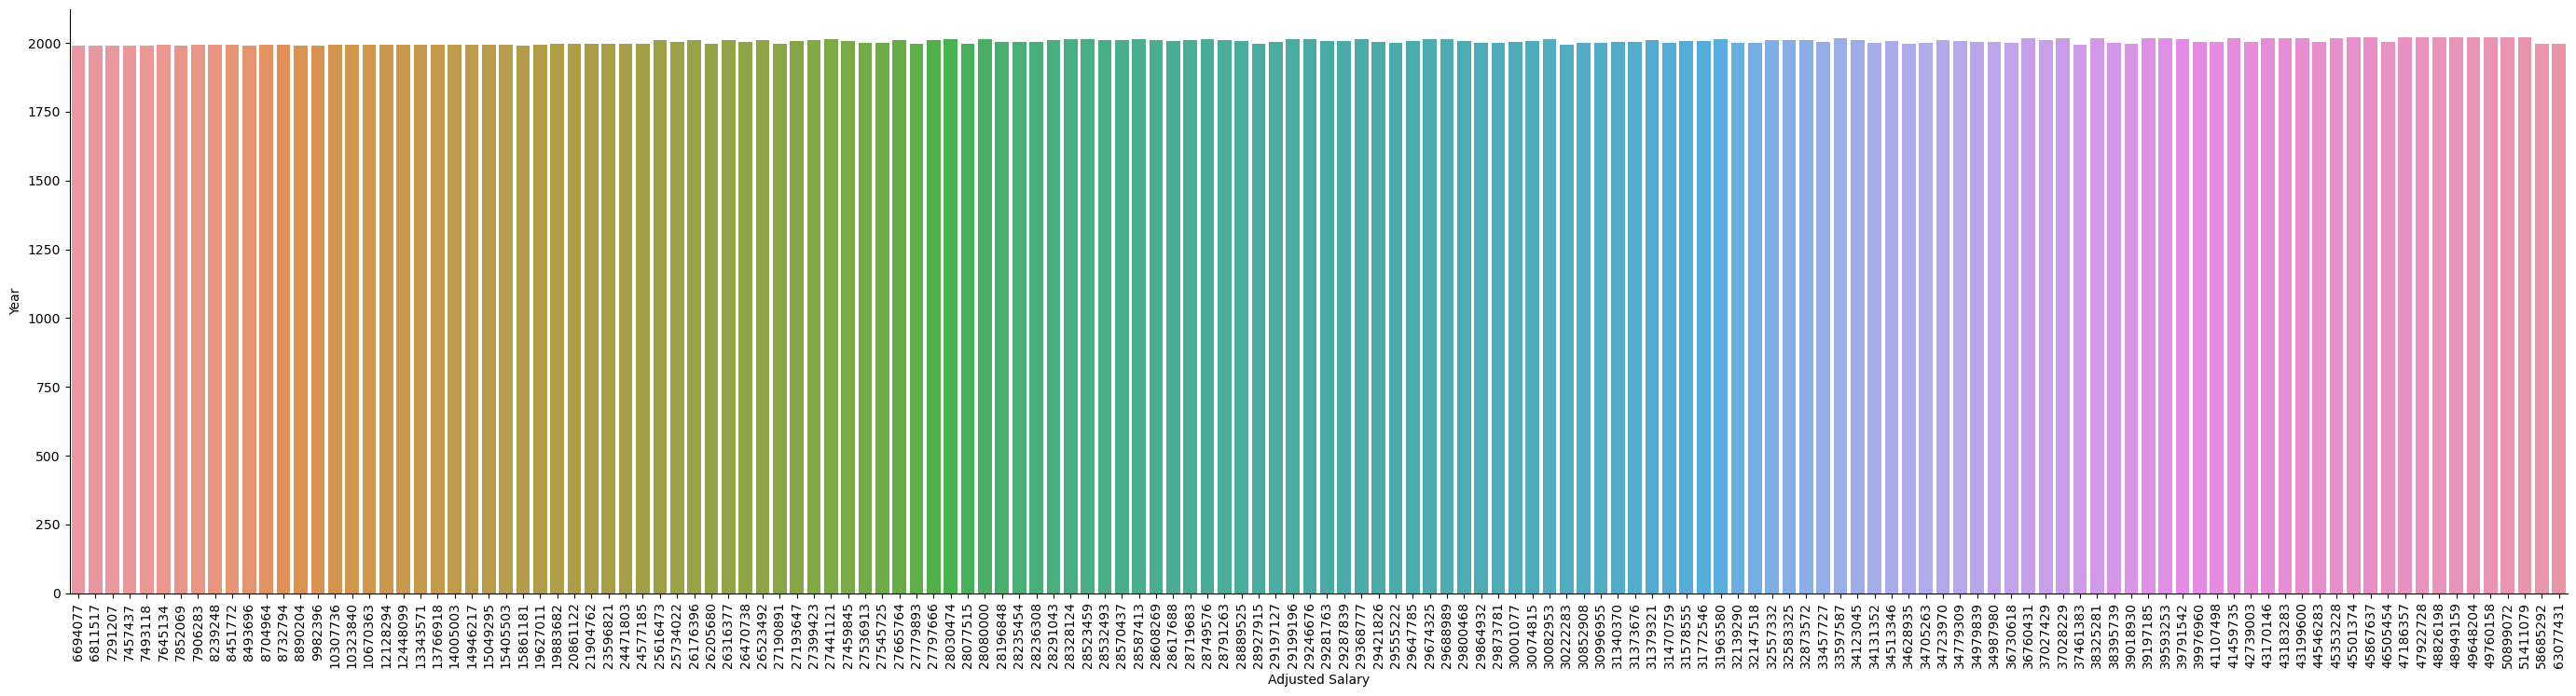

In [21]:

# this displays a chart of all the adjusted salaries, and their correlating year
sb.catplot(x="Adjusted Salary", y="Year", aspect=4, height=7, data=adjustedSalaryOnlyDF, kind="bar").set_xticklabels(rotation=90)


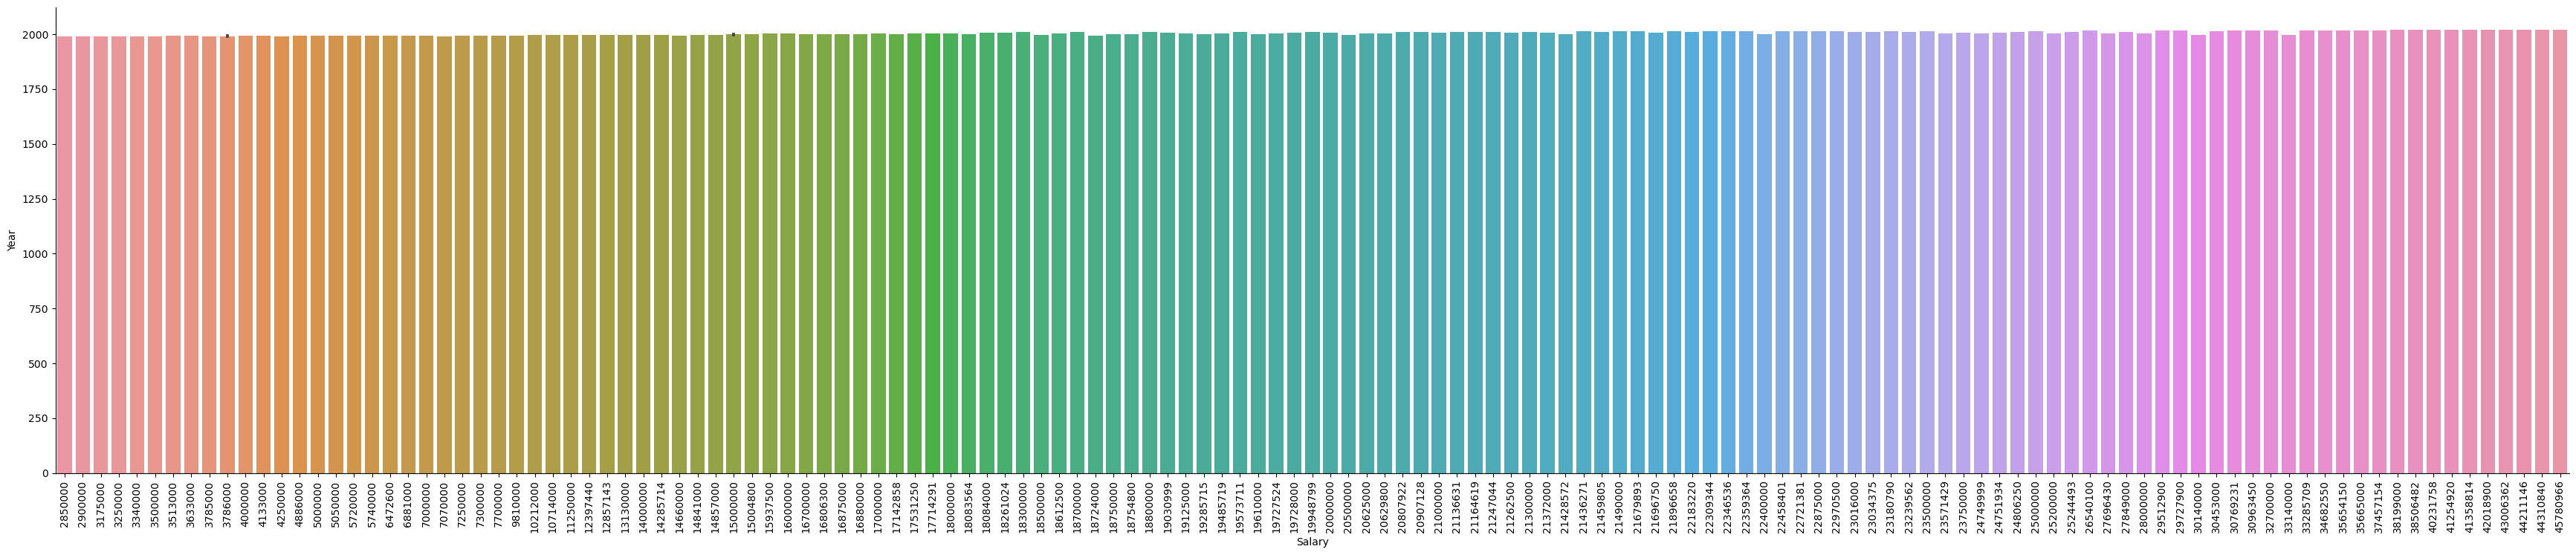

In [22]:

# this displays a chart of all the adjusted salaries, and their correlating year
sb.catplot(x="Salary", y="Year", aspect=5, height=7, data=salaryOnlyDF, kind="bar").set_xticklabels(rotation=90)




In [23]:
# creates a DF using every matching player who won an MVP and championship in the same year, and also
# has been a top 5 paid player in a season
mvpChampSalary = pd.DataFrame(matchingPlayers, columns=['Player'])

# displays the DF
mvpChampSalary

,Player
0,Hakeem Olajuwon
1,Larry Bird
2,Michael Jordan
3,Michael Jordan
4,Magic Johnson
5,Michael Jordan
6,Shaquille O'Neal
7,Michael Jordan
8,Shaquille O'Neal
9,Shaquille O'Neal


In [24]:
# to see how many specific individual players have accomplished this feat, i used pandas built in
# drop_duplicates() to better visiualize
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

mvpChampSalary.drop_duplicates()

,Player
0,Hakeem Olajuwon
1,Larry Bird
2,Michael Jordan
4,Magic Johnson
6,Shaquille O'Neal
21,Tim Duncan
25,LeBron James
27,Stephen Curry


In [25]:

numberOfMvpChampTop5Salaries = len(mvpChampSalary.drop_duplicates())
print("There have been {} players who have been in the top five highest players paid in a season, while also winning an MVP and a championship in the same year, and being top twenty in the statistic you chose.".format(numberOfMvpChampTop5Salaries))
      

There have been 8 players who have been in the top five highest players paid in a season, while also winning an MVP and a championship in the same year, and being top twenty in the statistic you chose.


In [ ]:
# after looking through all the players who have won mvps, who have won championships, who have won 
# the mvp award and a championship in the same year, and the players who have done this while also being
# top 20 in a certain statistic, a very slim amount of players (since there has been complete NBA salary data)
# who have been top 5 in a certain season in compensation.

# there are two different things this data could tell us. 
# 1: These players we see in our final dataframe
# are the best basketball players of all time, in their given catagory whether that is scoring, assisting, or
# shooting from beyond the arc.
# 2: There are dozens of players who have accomplished winning an MVP and a championship in the same year
# while also being dominant in their given catagory while not being comepensated accordingly